# Ejercicio 5 - Regularización

La regularización busca resolver problemas mal condicionados a partir del conocimiento de problemas bien condicionados, buscando un balance entre amplificación del ruido y calidad de la reconstrucción.
Los métodos más comunes de regularización se dividen en directos, iterativos, recursivos y estocásticos.

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import cv2 as cv

### Carga de la imagen

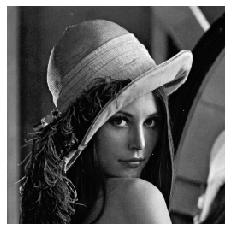

In [7]:
img = cv.imread('../resources/lena.tif', cv.IMREAD_GRAYSCALE) / 255
img = cv.resize(img, (255, 255))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

## Distorsion de la imagen

In [8]:
from numpy.fft import fft2, ifft2, fftshift, ifftshift 

In [9]:
def blurr_fft(img):
   # Build and apply a Gaussian filter.
    n_img = img.shape[0]
    sigma = 20
    c = n_img/2
    x = np.linspace(0, n_img, n_img)
    y = np.linspace(0, n_img, n_img)
    X, Y = np.meshgrid(x, y)
    H = np.exp(-(((X-c)/sigma)**2 + ((Y-c)/sigma)**2))

    I = fftshift(fft2(img))

    Y = H * I

    blurred_img = ifft2(ifftshift(Y)).real
 
    return blurred_img, H

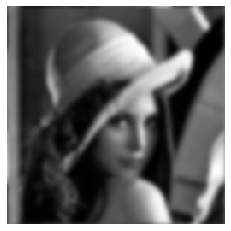

In [11]:
img_distorted_fft, H = blurr_fft(img)

plt.figure()
plt.imshow(img_distorted_fft, cmap='gray')
plt.axis('off')
plt.show()

## Agregado de ruido

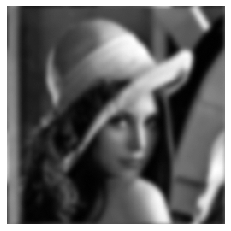

In [14]:
SNRdB = 40
std_dev = np.std(img_distorted_fft)
sigma_noise = np.sqrt( std_dev **2 * 10 ** (-SNRdB / 10))
noise =  np.random.normal(loc=0, scale=sigma_noise, size=img.shape)
g = img_distorted_fft + noise
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

In [15]:
Caux = np.array([[0, -0.25, 0],
                 [-0.25,  -1, -0.25],
                 [0, -0.25, 0]], np.float32)

aux = cv.filter2D(img, -1, Caux)

C = aux @ np.linalg.inv(img)

In [16]:
# C and H matrixes need to have the same shape as the image, insert them at the center of empty matrixes
n_img = img.shape[0]

# C = insert_at_center(Caux, n_img)
# C = np.eye(n_img)

In [17]:
# Constante de Tikhonov-Miller
bsnr = np.var(img.flatten()) / n_img**2 /  np.var(noise.flatten()) 
alpha =  1 / bsnr
print(alpha)

1525.318931021528


In [18]:
lambdas, _ = np.linalg.eig(H.T @ H + alpha * C.T @ C)
lambda_max = np.abs(lambdas).max()

In [19]:
beta = 2 / lambda_max
print(beta)

1.7364298197973287e-08


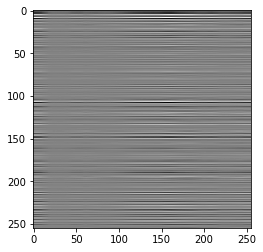

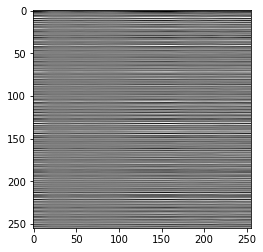

In [118]:
fk = (beta * H.T) * g # fo
plt.imshow(fk, cmap='gray')
plt.figure()
for k in range(50):
    fk = fk + beta * (H.T * g - (H.T * H + alpha * C.T * C) * fk)

plt.imshow(fk, cmap='gray')
plt.show()

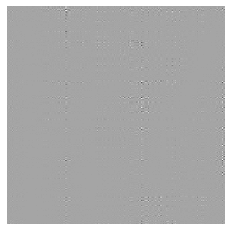

In [20]:
f = np.linalg.inv(H.T * H + alpha * C.T * C) * H.T * img_distorted
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()